In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
session=cc.database.create_session()

In [3]:
client = Client()
client

<Client: 'tcp://127.0.0.1:34059' processes=4 threads=8, memory=32.00 GiB>

In [4]:
# set different density layers
rho1 = 1037.06
rho2 = 1037.10
rho3 = 1037.15
rho4 = 1037.20

In [5]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'

In [6]:
# set the line color
c = ['k','r','b','m','salmon','k']
label=['0','1037.06','1037.10','1037.15','1037.20','1037.20+']
# set the line color
c_01 = ['k','r','b','salmon','k']

In [7]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

# density layer transect

In [8]:
# Hycom1
# load umo and hmo 
umom = cc.querying.getvar('panant-01-hycom1','umo', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
hmom = cc.querying.getvar('panant-01-hycom1','hmo',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [9]:
# Hycom1
# lower than 1037.06
flux1_MOM = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).cumsum('yh').sum('rho2_l')/1e9).load()
h1 = hmom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,rho1)).sum('rho2_l').load()
# 1037.06 - 1037.10
flux2 = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).cumsum('yh').sum('rho2_l')/1e9).load()
h2 = hmom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho1,rho2)).sum('rho2_l').load()
# 1037.10 - 1037.15
flux3 = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).cumsum('yh').sum('rho2_l')/1e9).load()
h3 = hmom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho2,rho3)).sum('rho2_l').load()
# 1037.15 - 1037.20
flux4 = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).cumsum('yh').sum('rho2_l')/1e9).load()
h4 = hmom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho3,rho4)).sum('rho2_l').load()
# upper than 1037.20
flux5 = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).cumsum('yh').sum('rho2_l')/1e9).load()
h5 = hmom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(rho4,1038.)).sum('rho2_l').load()

In [10]:
# compute the transects
x1=-30
depth1_MOM = np.stack([0.0*h1.sel(xh=x1,method='nearest').values,
                   h1.sel(xh=x1,method='nearest').values,
                   (h1+h2).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x1,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x1,method='nearest').values])
fluxes1_MOM = np.stack([flux1_MOM.sel(xq=x1,method='nearest').values,
                   flux2.sel(xq=x1,method='nearest').values,
                    flux3.sel(xq=x1,method='nearest').values,
                    flux4.sel(xq=x1,method='nearest').values,
                    flux5.sel(xq=x1,method='nearest').values])

x3=30
depth3_MOM = np.stack([0.0*h1.sel(xh=x3,method='nearest').values,
                   h1.sel(xh=x3,method='nearest').values,
                   (h1+h2).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x3,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x3,method='nearest').values])
fluxes3_MOM = np.stack([flux1_MOM.sel(xq=x3,method='nearest').values,
                   flux2.sel(xq=x3,method='nearest').values,
                    flux3.sel(xq=x3,method='nearest').values,
                    flux4.sel(xq=x3,method='nearest').values,
                    flux5.sel(xq=x3,method='nearest').values])

x4=75
depth4_MOM = np.stack([0.0*h1.sel(xh=x4,method='nearest').values,
                   h1.sel(xh=x4,method='nearest').values,
                   (h1+h2).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x4,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x4,method='nearest').values])
fluxes4_MOM = np.stack([flux1_MOM.sel(xq=x4,method='nearest').values,
                   flux2.sel(xq=x4,method='nearest').values,
                    flux3.sel(xq=x4,method='nearest').values,
                    flux4.sel(xq=x4,method='nearest').values,
                    flux5.sel(xq=x4,method='nearest').values])

x5=-270
depth5_MOM = np.stack([0.0*h1.sel(xh=x5,method='nearest').values,
                   h1.sel(xh=x5,method='nearest').values,
                   (h1+h2).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x5,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x5,method='nearest').values])
fluxes5_MOM = np.stack([flux1_MOM.sel(xq=x5,method='nearest').values,
                   flux2.sel(xq=x5,method='nearest').values,
                    flux3.sel(xq=x5,method='nearest').values,
                    flux4.sel(xq=x5,method='nearest').values,
                    flux5.sel(xq=x5,method='nearest').values])

x6=-210
depth6_MOM = np.stack([0.0*h1.sel(xh=x6,method='nearest').values,
                   h1.sel(xh=x6,method='nearest').values,
                   (h1+h2).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x6,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x6,method='nearest').values])
fluxes6_MOM = np.stack([flux1_MOM.sel(xq=x6,method='nearest').values,
                   flux2.sel(xq=x6,method='nearest').values,
                    flux3.sel(xq=x6,method='nearest').values,
                    flux4.sel(xq=x6,method='nearest').values,
                    flux5.sel(xq=x6,method='nearest').values])

x7=-180
depth7_MOM = np.stack([0.0*h1.sel(xh=x7,method='nearest').values,
                   h1.sel(xh=x7,method='nearest').values,
                   (h1+h2).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x7,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x7,method='nearest').values])
fluxes7_MOM = np.stack([flux1_MOM.sel(xq=x7,method='nearest').values,
                   flux2.sel(xq=x7,method='nearest').values,
                    flux3.sel(xq=x7,method='nearest').values,
                    flux4.sel(xq=x7,method='nearest').values,
                    flux5.sel(xq=x7,method='nearest').values])

x9=-130
depth9_MOM = np.stack([0.0*h1.sel(xh=x9,method='nearest').values,
                   h1.sel(xh=x9,method='nearest').values,
                   (h1+h2).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4).sel(xh=x9,method='nearest').values,
                   (h1+h2+h3+h4+h5).sel(xh=x9,method='nearest').values])
fluxes9_MOM = np.stack([flux1_MOM.sel(xq=x9,method='nearest').values,
                   flux2.sel(xq=x9,method='nearest').values,
                    flux3.sel(xq=x9,method='nearest').values,
                    flux4.sel(xq=x9,method='nearest').values,
                    flux5.sel(xq=x9,method='nearest').values])

In [15]:
# ACCESS-OM2-01
# load umo and rho
umo01 = cc.querying.getvar('01deg_jra55v13_iaf','tx_trans_rho', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
rho01 = cc.querying.getvar('01deg_jra55v13_iaf','pot_rho_2',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
#dz
dz01 = cc.querying.getvar('01deg_jra55v13_iaf','dzt', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [12]:
# set different density layers
rho1 = 1037.06
rho2 = 1037.10
rho3 = 1037.20

In [13]:
# ACCESS-OM2-01
# flux
# lower than 1037.06
flux1_01 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,rho1)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.06 - 1037.10
flux2 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho1,rho2)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.10 - 1037.20
flux3 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho2,rho3)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.20-
flux4 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho3,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

In [17]:
rho01 = rho01.sel(yt_ocean = slice(-90,-50)).mean('time').load()
dz01 = dz01.sel(yt_ocean = slice(-90,-50)).mean('time').load()

In [20]:
# compute the transects
x1=-30
#filter the layers
density1 = rho01.sel(xt_ocean=x1,method='nearest')
dz1 = dz01.sel(xt_ocean=x1,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x1,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x1,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x1,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth1_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes1_01 = np.stack([flux1_01.sel(grid_xu_ocean=x1,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x1,method='nearest').values])

x3=30
#filter the layers
density1 = rho01.sel(xt_ocean=x3,method='nearest')
dz1 = dz01.sel(xt_ocean=x3,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x3,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x3,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x3,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth3_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes3_01 = np.stack([flux1_01.sel(grid_xu_ocean=x3,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x3,method='nearest').values])

x4=75
#filter the layers
density1 = rho01.sel(xt_ocean=x4,method='nearest')
dz1 = dz01.sel(xt_ocean=x4,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x4,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x4,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x4,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth4_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes4_01= np.stack([flux1_01.sel(grid_xu_ocean=x4,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x4,method='nearest').values])

x5=-270
#filter the layers
density1 = rho01.sel(xt_ocean=x5,method='nearest')
dz1 = dz01.sel(xt_ocean=x5,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x5,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x5,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x5,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth5_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes5_01 = np.stack([flux1_01.sel(grid_xu_ocean=x5,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x5,method='nearest').values])

x6=-210
#filter the layers
density1 = rho01.sel(xt_ocean=x6,method='nearest')
dz1 = dz01.sel(xt_ocean=x6,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x6,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x6,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x6,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth6_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes6_01 = np.stack([flux1_01.sel(grid_xu_ocean=x6,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x6,method='nearest').values])

x7=-180
#filter the layers
density1 = rho01.sel(xt_ocean=x7,method='nearest')
dz1 = dz01.sel(xt_ocean=x7,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x7,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x7,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x7,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth7_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes7_01 = np.stack([flux1_01.sel(grid_xu_ocean=x7,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x7,method='nearest').values])

x9=-130
#filter the layers
density1 = rho01.sel(xt_ocean=x9,method='nearest')
dz1 = dz01.sel(xt_ocean=x9,method='nearest').where(density1<rho1).load()
dz2 = dz01.sel(xt_ocean=x9,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz01.sel(xt_ocean=x9,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz01.sel(xt_ocean=x9,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth9_01 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes9_01 = np.stack([flux1_01.sel(grid_xu_ocean=x9,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x9,method='nearest').values])

In [21]:
# ACCESS-OM2-025
# load umo and rho
umo025 = cc.querying.getvar('025deg_jra55v13_iaf_gmredi6','tx_trans_rho', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
rho025 = cc.querying.getvar('025deg_jra55v13_iaf_gmredi6','pot_rho_2',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
#dz
dz025 = cc.querying.getvar('025deg_jra55v13_iaf_gmredi6','dzt', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [22]:
# density layer flux
# lower than 1037.06
flux1_025 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,rho1)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.06 - 1037.10
flux2 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho1,rho2)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.10 - 1037.20
flux3 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho2,rho3)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.20-
flux4 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho3,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

In [23]:
dz025 = dz025.sel(yt_ocean = slice(-90,-50)).mean('time').load()
rho025 = rho025.sel(yt_ocean = slice(-90,-50)).mean('time').load()

In [24]:
# compute the transects
x1=-30
#filter the layers
density1 = rho025.sel(xt_ocean=x1,method='nearest')
dz1 = dz025.sel(xt_ocean=x1,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x1,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x1,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x1,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth1_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes1_025 = np.stack([flux1_025.sel(grid_xu_ocean=x1,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x1,method='nearest').values])

x3=30
#filter the layers
density1 = rho025.sel(xt_ocean=x3,method='nearest')
dz1 = dz025.sel(xt_ocean=x3,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x3,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x3,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x3,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth3_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes3_025 = np.stack([flux1_025.sel(grid_xu_ocean=x3,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x3,method='nearest').values])

x4=75
#filter the layers
density1 = rho025.sel(xt_ocean=x4,method='nearest')
dz1 = dz025.sel(xt_ocean=x4,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x4,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x4,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x4,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth4_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes4_025 = np.stack([flux1_025.sel(grid_xu_ocean=x4,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x4,method='nearest').values])

x5=-270
#filter the layers
density1 = rho025.sel(xt_ocean=x5,method='nearest')
dz1 = dz025.sel(xt_ocean=x5,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x5,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x5,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x5,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth5_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes5_025 = np.stack([flux1_025.sel(grid_xu_ocean=x5,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x5,method='nearest').values])

x6=-210
#filter the layers
density1 = rho025.sel(xt_ocean=x6,method='nearest')
dz1 = dz025.sel(xt_ocean=x6,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x6,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x6,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x6,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth6_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes6_025 = np.stack([flux1_025.sel(grid_xu_ocean=x6,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x6,method='nearest').values])

x7=-180
#filter the layers
density1 = rho025.sel(xt_ocean=x7,method='nearest')
dz1 = dz025.sel(xt_ocean=x7,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x7,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x7,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x7,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth7_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes7_025 = np.stack([flux1_025.sel(grid_xu_ocean=x7,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x7,method='nearest').values])

x9=-130
#filter the layers
density1 = rho025.sel(xt_ocean=x9,method='nearest')
dz1 = dz025.sel(xt_ocean=x9,method='nearest').where(density1<rho1).load()
dz2 = dz025.sel(xt_ocean=x9,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz025.sel(xt_ocean=x9,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz025.sel(xt_ocean=x9,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth9_025 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes9_025 = np.stack([flux1_025.sel(grid_xu_ocean=x9,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x9,method='nearest').values])

In [25]:
session1=cc.database.create_session()

In [26]:
# ACCESS-OM2
# load umo and rho
umo1 = cc.querying.getvar('1deg_jra55v13_iaf_spinup1_B1','tx_trans_rho', session1, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [33]:
rho = cc.querying.getvar('1deg_jra55v13_iaf_spinup1_B1','pot_rho_2',session1,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time)).mean('time').sel(yt_ocean = slice(-90,-50))
#dz
dz = cc.querying.getvar('1deg_jra55v13_iaf_spinup1_B1','dzt', session1, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time)).mean('time').sel(yt_ocean = slice(-90,-50))

In [28]:
# flux in each density layer
# lower than 1037.06
flux1 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,rho1)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.06 - 1037.10
flux2 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho1,rho2)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.10 - 1037.20
flux3 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho2,rho3)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# 1037.20-
flux4 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(rho3,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

In [34]:
# compute the transects
x1=-30
#filter the layers
density1 = rho.sel(xt_ocean=x1,method='nearest')
dz1 = dz.sel(xt_ocean=x1,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x1,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x1,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x1,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth1 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes1 = np.stack([flux1.sel(grid_xu_ocean=x1,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x1,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x1,method='nearest').values])

x2=0
#filter the layers
density1 = rho.sel(xt_ocean=x2,method='nearest')
dz1 = dz.sel(xt_ocean=x2,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x2,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x2,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x2,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth2 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes2 = np.stack([flux1.sel(grid_xu_ocean=x2,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x2,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x2,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x2,method='nearest').values])

x3=30
#filter the layers
density1 = rho.sel(xt_ocean=x3,method='nearest')
dz1 = dz.sel(xt_ocean=x3,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x3,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x3,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x3,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth3 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes3 = np.stack([flux1.sel(grid_xu_ocean=x3,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x3,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x3,method='nearest').values])

x4=75
#filter the layers
density1 = rho.sel(xt_ocean=x4,method='nearest')
dz1 = dz.sel(xt_ocean=x4,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x4,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x4,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x4,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth4 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes4 = np.stack([flux1.sel(grid_xu_ocean=x4,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x4,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x4,method='nearest').values])

x5=-270
#filter the layers
density1 = rho.sel(xt_ocean=x5,method='nearest')
dz1 = dz.sel(xt_ocean=x5,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x5,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x5,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x5,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth5 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes5 = np.stack([flux1.sel(grid_xu_ocean=x5,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x5,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x5,method='nearest').values])

x6=-210
#filter the layers
density1 = rho.sel(xt_ocean=x6,method='nearest')
dz1 = dz.sel(xt_ocean=x6,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x6,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x6,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x6,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth6 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes6 = np.stack([flux1.sel(grid_xu_ocean=x6,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x6,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x6,method='nearest').values])

x7=-180
#filter the layers
density1 = rho.sel(xt_ocean=x7,method='nearest')
dz1 = dz.sel(xt_ocean=x7,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x7,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x7,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x7,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth7 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes7 = np.stack([flux1.sel(grid_xu_ocean=x7,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x7,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x7,method='nearest').values])

x9=-130
#filter the layers
density1 = rho.sel(xt_ocean=x9,method='nearest')
dz1 = dz.sel(xt_ocean=x9,method='nearest').where(density1<rho1).load()
dz2 = dz.sel(xt_ocean=x9,method='nearest').where(density1>rho1).where(density1<rho2).load()
dz3 = dz.sel(xt_ocean=x9,method='nearest').where(density1>rho2).where(density1<rho3).load()
dz4 = dz.sel(xt_ocean=x9,method='nearest').where(density1>rho3).load()
# calculate the layer thickness
h1 = dz1.sum('st_ocean').load()
h2 = dz2.sum('st_ocean').load()
h3 = dz3.sum('st_ocean').load()
h4 = dz4.sum('st_ocean').load()

# set the different layers
depth9 = np.stack([0.0*h1.values,
                   h1.values,
                   (h1+h2).values,
                   (h1+h2+h3).values,
                   (h1+h2+h3+h4).values])
fluxes9 = np.stack([flux1.sel(grid_xu_ocean=x9,method='nearest').values,
                   flux2.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux3.sel(grid_xu_ocean=x9,method='nearest').values,
                    flux4.sel(grid_xu_ocean=x9,method='nearest').values])

Text(0, 0.5, 'streamfunction (Sv)')

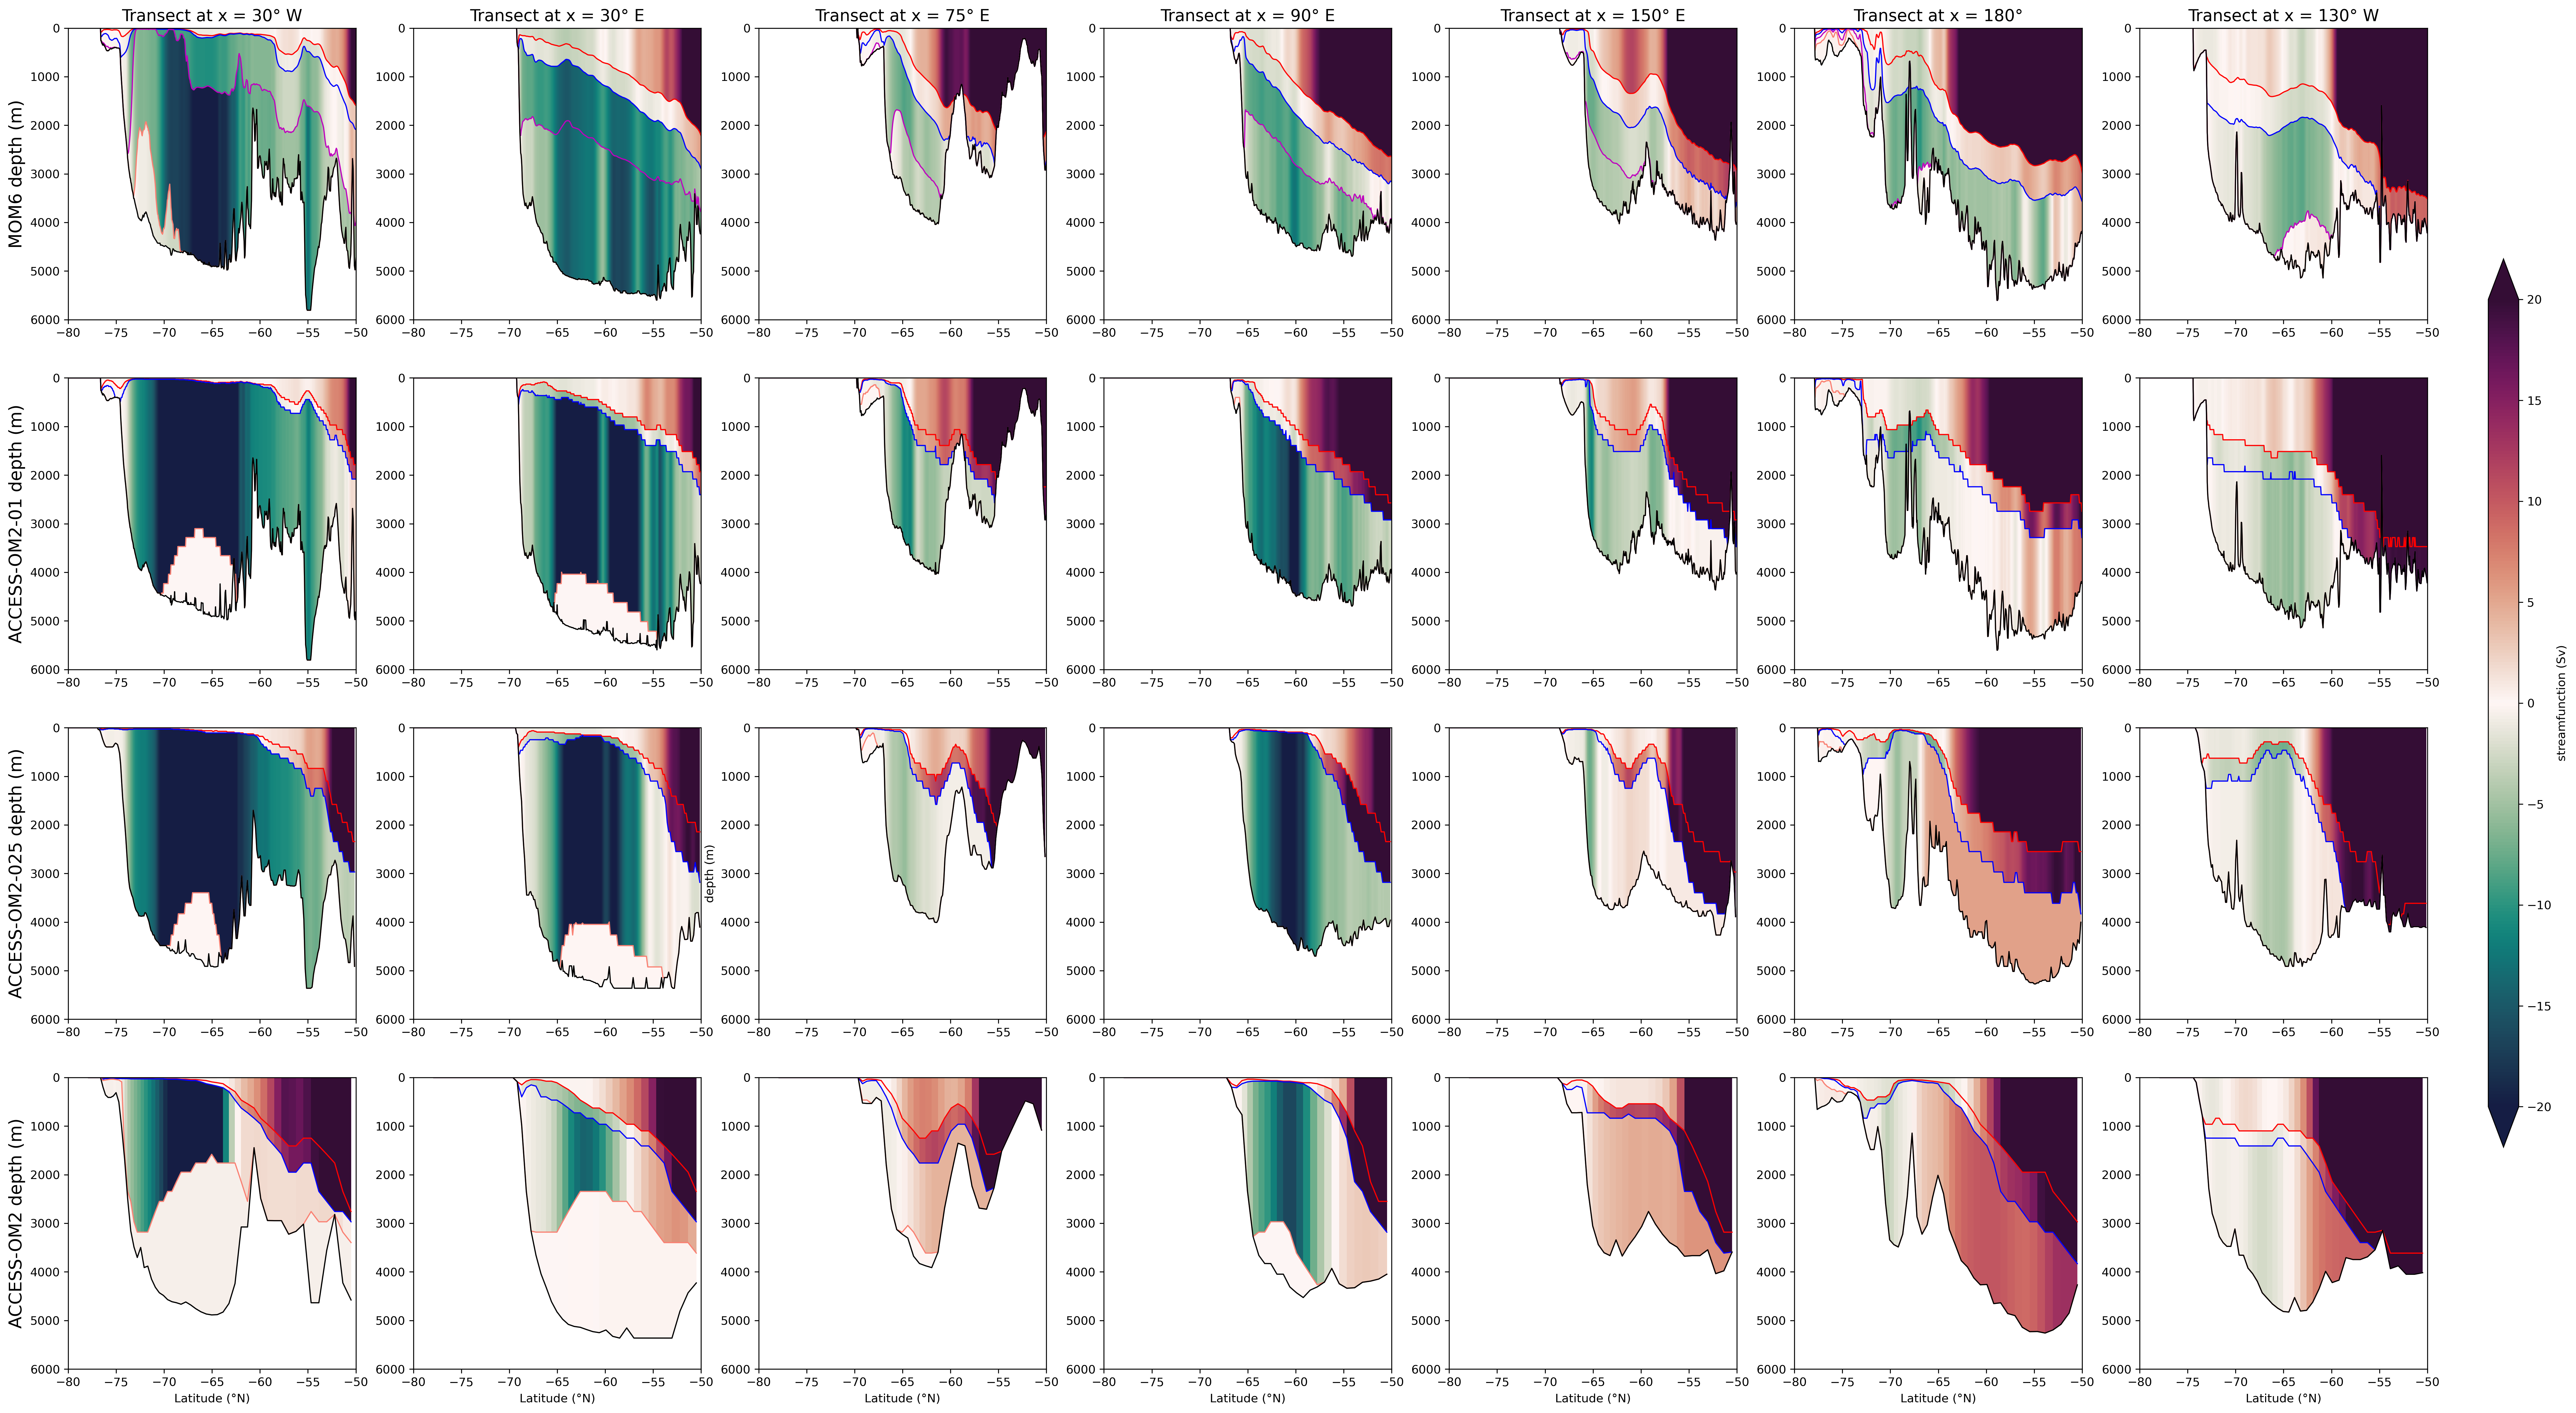

In [46]:
# plot the outputs
plt.figure(figsize=(36,21),dpi = 300)

#MOM6
# -30E
plt.subplot(4,7,1)
p1 = plt.pcolor(flux1_MOM.yh.values,depth1_MOM,fluxes1_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth1_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 30° W',fontsize = 14)
plt.xlim(-80,-50)
plt.ylabel('MOM6 depth (m)', fontsize = 15)



# 30E
plt.subplot(4,7,2)
p1 = plt.pcolor(flux1_MOM.yh.values,depth3_MOM,fluxes3_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth3_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 30° E',fontsize = 14)
plt.xlim(-80,-50)


# 75E
plt.subplot(4,7,3)
p1 = plt.pcolor(flux1_MOM.yh.values,depth4_MOM,fluxes4_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth4_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 75° E',fontsize = 14)
plt.xlim(-80,-50)


# 90E
plt.subplot(4,7,4)
p1 = plt.pcolor(flux1_MOM.yh.values,depth5_MOM,fluxes5_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth5_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 90° E',fontsize = 14)
plt.xlim(-80,-50)

# 150E
plt.subplot(4,7,5)
p1 = plt.pcolor(flux1_MOM.yh.values,depth6_MOM,fluxes6_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth6_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 150° E',fontsize = 14)
plt.xlim(-80,-50)


# 180
plt.subplot(4,7,6)
p1 = plt.pcolor(flux1_MOM.yh.values,depth7_MOM,fluxes7_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth7_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 180°',fontsize = 14)
plt.xlim(-80,-50)


# 130W
plt.subplot(4,7,7)
p1 = plt.pcolor(flux1_MOM.yh.values,depth9_MOM,fluxes9_MOM[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(6):
    contours=plt.plot(flux1_MOM.yh.values,depth9_MOM[ii,:],color = c[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.title('Transect at x = 130° W',fontsize = 14)
plt.xlim(-80,-50)

#ACCESS-OM2-01
# 30W
plt.subplot(4,7,8)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth1_01,fluxes1_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth1_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.ylabel('ACCESS-OM2-01 depth (m)',fontsize = 15)


# 30E
plt.subplot(4,7,9)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth3_01,fluxes3_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth3_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# 75E
plt.subplot(4,7,10)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth4_01,fluxes4_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth4_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)



# 90E
plt.subplot(4,7,11)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth5_01,fluxes5_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth5_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)

# 150E
plt.subplot(4,7,12)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth6_01,fluxes6_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth6_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# 180
plt.subplot(4,7,13)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth7_01,fluxes7_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth7_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)



# 130W
plt.subplot(4,7,14)
p1 = plt.pcolor(flux1_01.grid_yt_ocean.values,depth9_01,fluxes9_01[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_01.grid_yt_ocean.values,depth9_01[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# ACCESS-OM2-025

# 30W
plt.subplot(4,7,15)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth1_025,fluxes1_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth1_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.ylabel('ACCESS-OM2-025 depth (m)',fontsize = 15)

# 30E
plt.subplot(4,7,16)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth3_025,fluxes3_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth3_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# 75E
plt.subplot(4,7,17)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth4_025,fluxes4_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth4_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.ylabel('depth (m)')


# 90E
plt.subplot(4,7,18)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth5_025,fluxes5_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth5_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)

# 150E
plt.subplot(4,7,19)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth6_025,fluxes6_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth6_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# 180
plt.subplot(4,7,20)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth7_025,fluxes7_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth7_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# 130W
plt.subplot(4,7,21)
p1 = plt.pcolor(flux1_025.grid_yt_ocean.values,depth9_025,fluxes9_025[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1_025.grid_yt_ocean.values,depth9_025[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)


# ACCESS-OM2
# 30W
plt.subplot(4,7,22)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth1,fluxes1[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth1[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.ylabel('ACCESS-OM2 depth (m)',fontsize = 15)
plt.xlabel('Latitude (°N)')

# 30E
plt.subplot(4,7,23)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth3,fluxes3[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth3[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# 75E
plt.subplot(4,7,24)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth4,fluxes4[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth4[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# 90E
plt.subplot(4,7,25)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth5,fluxes5[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth5[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')
# 150E
plt.subplot(4,7,26)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth6,fluxes6[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth6[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# 180
plt.subplot(4,7,27)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth7,fluxes7[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth7[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')

# 130W
plt.subplot(4,7,28)
p1 = plt.pcolor(flux1.grid_yt_ocean.values,depth9,fluxes9[:,1:],shading='flat',vmin=-20,vmax=20,cmap=cm.cm.curl)
for ii in range(5):
    contours=plt.plot(flux1.grid_yt_ocean.values,depth9[ii,:],color = c_01[ii],label=label[ii],linewidth = 1)
plt.ylim(0,6000)
plt.gca().invert_yaxis()
plt.xlim(-80,-50)
plt.xlabel('Latitude (°N)')
# add colorbar
ax = plt.axes([0.92, 0.25, 0.01, 0.5])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

# density layer maps

In [37]:
# Hycom1
# load umo and hmo 
umom = cc.querying.getvar('panant-01-hycom1','umo', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))
hmom = cc.querying.getvar('panant-01-hycom1','hmo',session,start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [38]:
# lower than 1037.10
MOM_up = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(0,1037.10)).cumsum('yh').sum('rho2_l')/1e9).load()
# upper than 1037.10
MOM_down = (umom.sel(time = slice(start_time,end_time)).mean('time').sel(rho2_l=slice(1037.10,2000.)).cumsum('yh').sum('rho2_l')/1e9).load()

In [39]:
# ACCESS-OM2-01
umo01 = cc.querying.getvar('01deg_jra55v13_iaf','tx_trans_rho', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [40]:
# flux
# lower than 1037.10
up_01 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,1037.10)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# UPPER than 1037.10
down_01 = (umo01.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(1037.10,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

In [41]:
# ACCESS-OM2-025
# load umo
umo025 = cc.querying.getvar('025deg_jra55v13_iaf_gmredi6','tx_trans_rho', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [42]:
# flux
# lower than 1037.10
up_025 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,1037.10)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# UPPER than 1037.10
down_025 = (umo025.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(1037.10,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

In [43]:
# ACCESS-OM2
# load umo and rho
umo1 = cc.querying.getvar('1deg_jra55v13_iaf_spinup1_B1','tx_trans_rho', session, start_time=start_time, end_time=end_time).sel(time = slice(start_time,end_time))

In [44]:
# flux
# lower than 1037.10
up_1 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(0,1037.10)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# UPPER than 1037.10
down_1 = (umo1.sel(grid_yt_ocean = slice(-90,-50)).mean('time').sel(potrho=slice(1037.10,2000.)).cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

Text(0.5, 0, 'Streamfunction (Sv)')

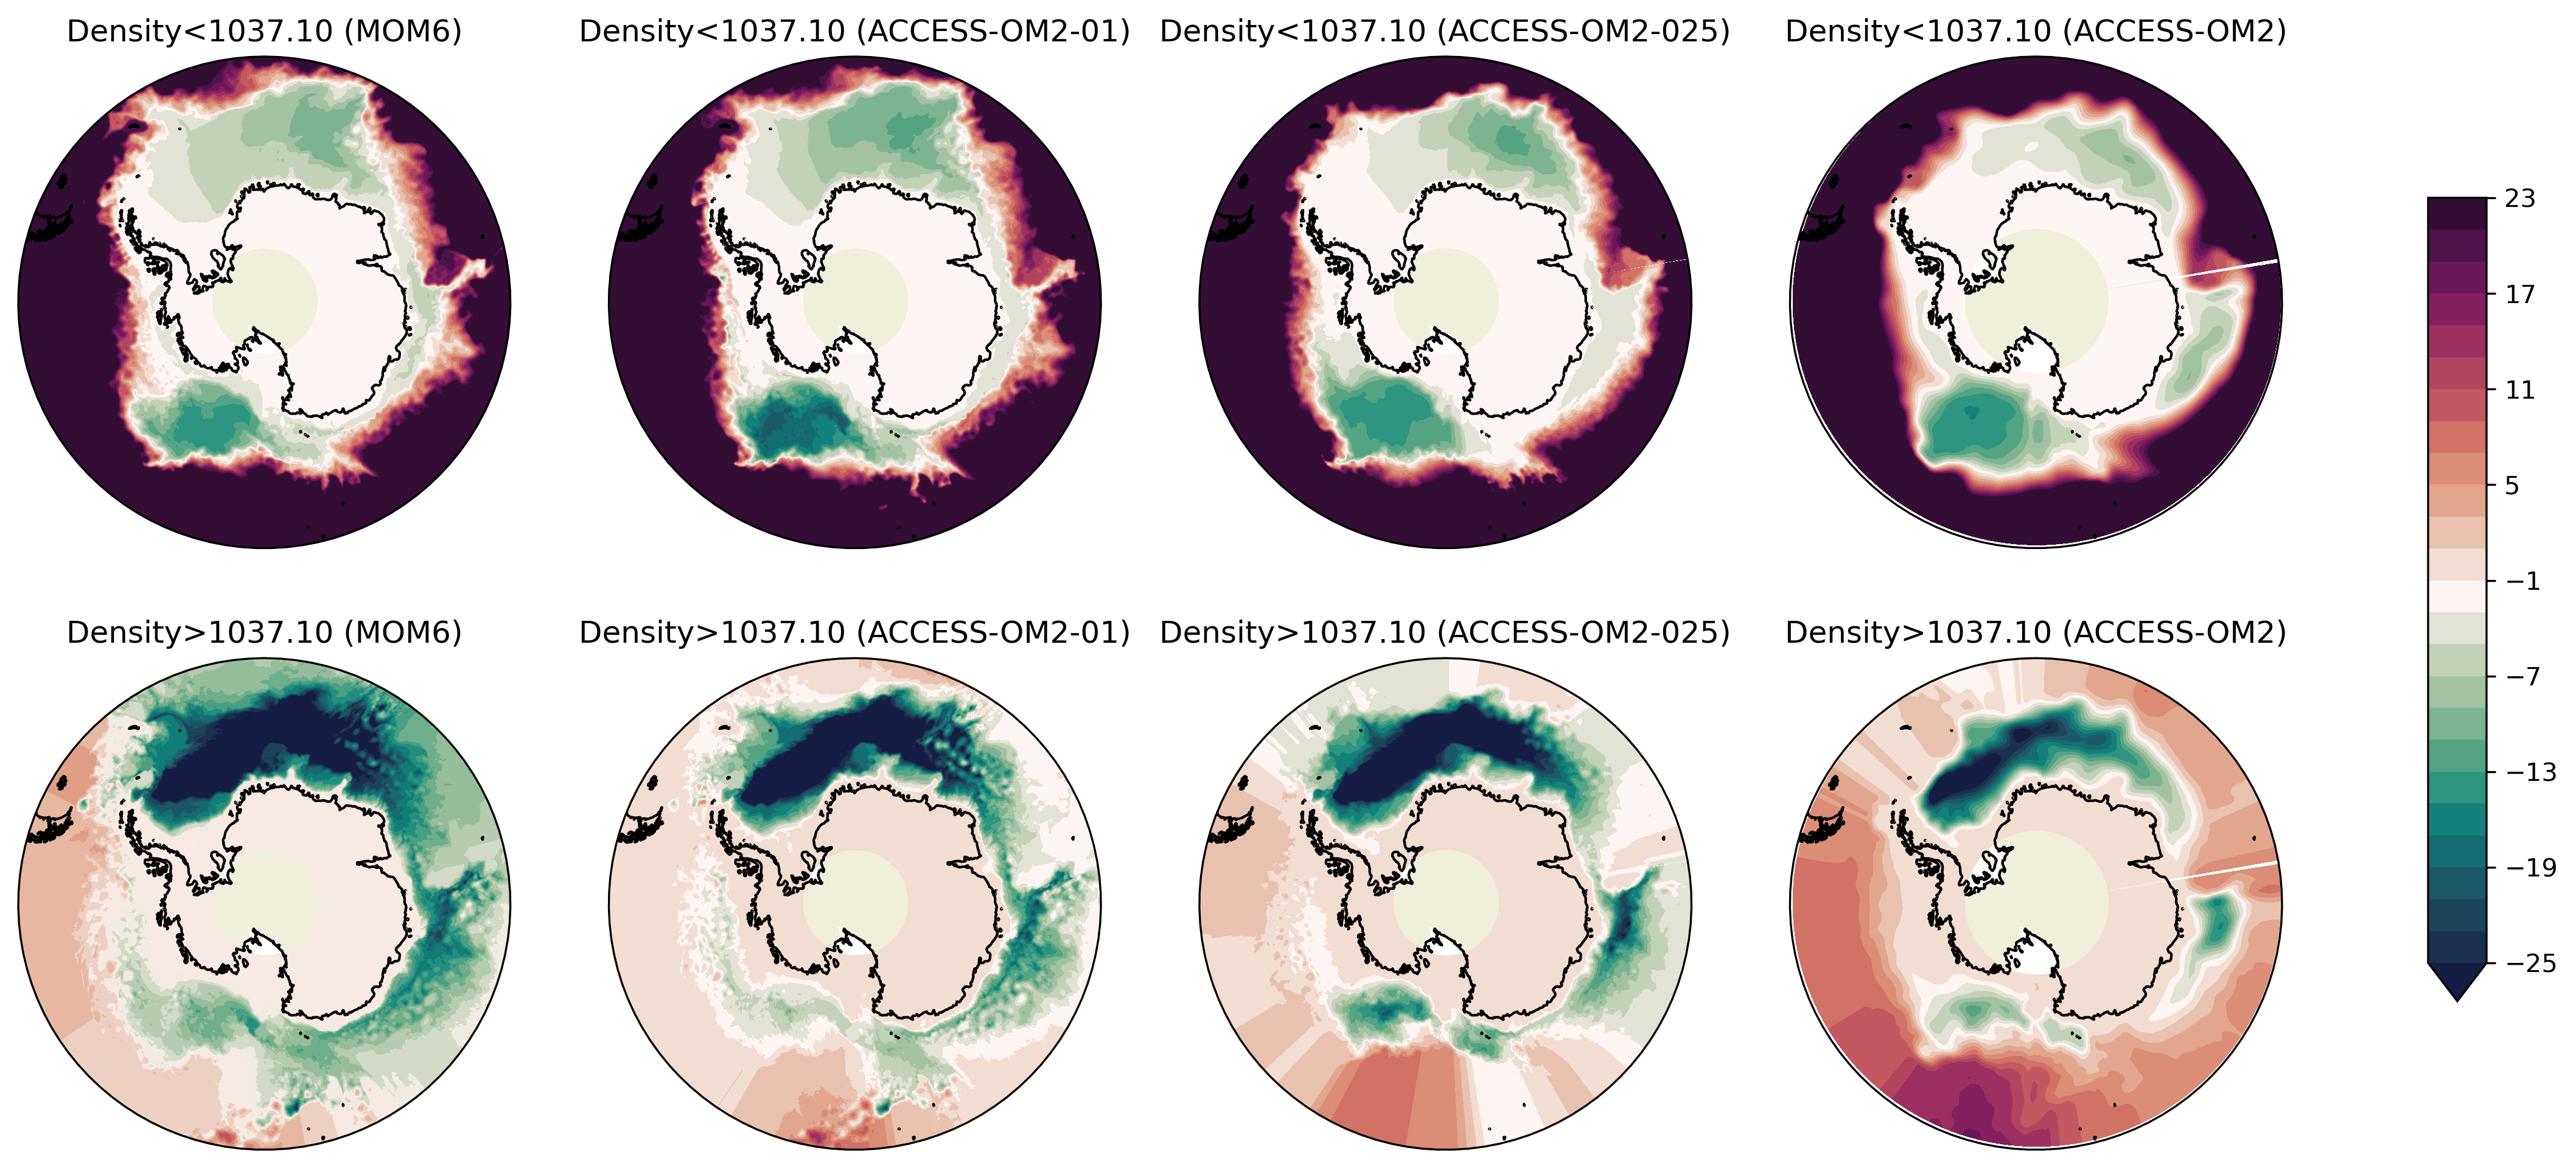

In [45]:
# plot
## plot umo 
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(16, 8), dpi=300)
# upper layers
# mom6
ax = plt.subplot(2,4,1,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = MOM_up.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density<1037.10 (MOM6)')

# access-om2-01
ax = plt.subplot(2,4,2,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = up_01.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density<1037.10 (ACCESS-OM2-01)')

# access-om2-025
ax = plt.subplot(2,4,3,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = up_025.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density<1037.10 (ACCESS-OM2-025)')

# access-om2
ax = plt.subplot(2,4,4,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = up_1.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density<1037.10 (ACCESS-OM2)')

# down layers
# mom6
ax = plt.subplot(2,4,5,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = MOM_down.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density>1037.10 (MOM6)')

# access-om2-01
ax = plt.subplot(2,4,6,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = down_01.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density>1037.10 (ACCESS-OM2-01)')

# access-om2-025
ax = plt.subplot(2,4,7,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = down_025.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density>1037.10 (ACCESS-OM2-025)')

# access-om2
ax = plt.subplot(2,4,8,projection = projection)

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = down_1.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Density>1037.10 (ACCESS-OM2)')

ax = plt.axes([0.95, 0.23, 0.02, 0.55])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend='both')
cb.ax.set_xlabel('Streamfunction (Sv)')